# Método Leapfrog (Salto de rana)

#### Problema

Resolver númericamente las ecuaciones de Hamilton para un hamiltoniano $H: \mathbb{R}^{2d} \to \mathbb{R} $ de la forma $H(q,p)= V(q) + K(p)$ para alguna condicición inicial. 

$$\begin{cases} \dot{q}^i = \frac{\partial H}{\partial p^i} =\frac{\partial K}{\partial p^i} \\ \dot{p}^i = - \frac{\partial H}{\partial q^i} = - \frac{\partial V}{\partial q^i} \\ (p(t_0), q(t_0)) = (p_0, q_0) \end{cases}$$

,

en este caso se usará $K(p):= \sum\limits_{j=1}^{\infty}  {p^j}^2$, por lo que el problema se reduce a 

#### Leapfrog (salto de rana)

Solución aproximada con tamaño de paso $\tau > 0$:

   $$\begin{cases} p^i(t_{k+ \frac{1}{2} }) = p^i(t_{k}) - \frac{\tau}{2} \frac{\partial V}{\partial q^i}\left(q^i(t_{k})\right)\  
   \\
   q^i(t_{k+1}) = q^i(t_{k}) + \tau \frac{\partial K}{\partial p^i}\left(p^i(t_{k})\right)\
   \\
   p^i(t_{k+1}) = p^i(t_{k}) - \tau \frac{\partial V}{\partial q^i}\left(q^i(t_{k})\right)\  
   \end{cases}$$
    
con $t_j=t_{j-1}+\epsilon$, $j=1,\ldots ,m$, $i=1,\ldots , d$.

In [1]:
miFloat = Union{Array{Float64},Float64}

@inline function leap_frog!(x::miFloat,p::miFloat,ϵ::Float64,L::Int64,grad_U::Function,s::miFloat=ones())
    # Momento medio paso
    p = p .- 0.5 .* ϵ .* grad_U(x)
    for i in 1:(L-1)
        # Posición paso completo
        x = x .+ ϵ .* s.^2.0 .* p
        # Momento paso completo, al juntar medio paso al final y principio de leapfrog a un paso
        p = p .- ϵ .* grad_U(x)
    end
    x = x .+ ϵ .* p
    # Momento medio paso, al ser el último leapfrog
    p = p .- 0.5 .* ϵ .* grad_U(x)
    return x, p
end

@inline function leap_frog(x::miFloat,p::miFloat,ϵ::Float64,L::Int64,grad_U::Function,s::miFloat=ones())
    x_vec = [ zeros(length(x)) for _ in 1:L ]
    p_vec = [ zeros(length(x)) for _ in 1:L ]
    p = p .- 0.5 .* ϵ .* grad_U(x)
    for i in 1:(L-1)
        # Posición paso completo
        x = x .+ ϵ .* s.^2.0 .* p
        x_vec[i] = x
        # Momento paso completo, al juntar medio paso al final y principio de leapfrog a un paso
        p = p .- ϵ .* grad_U(x)
        p_vec[i] = p
    end
    x = x .+ ϵ .* p
    x_vec[L] = x
    p = p .- 0.5 .* ϵ .* grad_U(x)
    p_vec[L] = p
    return x_vec, p_vec
end

leap_frog (generic function with 2 methods)

# Simulación de la normal univariada

In [2]:
using Distributions

n = 10000 #Número de iteraciones

N = rand(Normal(),n) #Momentos genereados de una normal estandar

q = zeros(n)  #Lista de pocisiones
p =  zeros(n) #Lista de momentos

t = 5
 
q[1] = -9 #Inicilizar las pocisiones
p[1] = rand(Normal()) #Inicilizar los momentos

#Dinamica Hamiltoniana
for i in 2:n    
    r = sqrt(q[i-1]^2.0+N[i]^2.0)
    a = acos(q[i-1]/r)
    q[i] = r*cos(atan(-N[i],q[i-1]) + t )
    p[i] = -r*sin(atan(-N[i],q[i-1]) + t )
end

In [3]:
using Plots

#Monte Carlo Hamiltoniano con dinamica hamiltoniana determinista

f(x) = 1/sqrt(2pi) * exp(-x^2/2)

histogram(p, label="Histograma, (10,000 iteraciones)", normalize=:pdf, color=:blue)
plot!(f, label="Dist. Normal", lw=3, color=:red, legend=:topleft)
savefig("Simulacion_Juguete.png")

"/Users/sabino/Desktop/Tesis/Simulacion_Juguete.png"

In [10]:
using Distributions

using Plots

f(q) = pdf(Normal(0, 1), q) #Distribución objetivo

g(p) = pdf(Normal(0, 1), p) #Distribución auxiliar

V(q) = - log( f(q) ) #Energía potencial

K(p) = - log( g(p) ) #Energía potencial

H(q, p) = V(q) + K(p)

B(q, p)= f(q)*g(p)

B (generic function with 1 method)

In [64]:
using Distributions

n = 20 #Número de iteraciones

N = rand(Normal(),n) #Momentos genereados de una normal estandar

q = zeros(n)  #Lista de pocisiones
p =  zeros(n) #Lista de momentos

t = 5
 
q[1] = -9 #Inicilizar las pocisiones
p[1] = rand(Normal()) #Inicilizar los momentos

#Dinamica Hamiltoniana
for i in 2:n    
    r = sqrt(q[i-1]^2.0+N[i]^2.0)
    a = acos(q[i-1]/r)
    q[i] = r*cos(atan(-N[i],q[i-1]) + t )
    p[i] = -r*sin(atan(-N[i],q[i-1]) + t )
end

In [65]:
x = range(-10, 10, length=1000)
y = range(-10, 10, length=1000)
z = @. H(x', y)
contourf(x, y, z, levels=40, color=:turbo, title= "Simulación de la distribución de Gibbs", aspect_ratio=:equal)

plot!(q, p, color=:"magenta", label="", xlim = (-10, 10), ylim=(-10, 10))
scatter!(q, p, label="", xlim = (-10, 10), ylim=(-10, 10))
scatter!([q[1]], [p[1]], label = "Punto inicial", xlim = (-10, 10), ylim=(-10, 10), color=:red)

savefig("Simulacion_Gibbs.png")

"/Users/sabino/Desktop/Tesis/Simulacion_Gibbs.png"

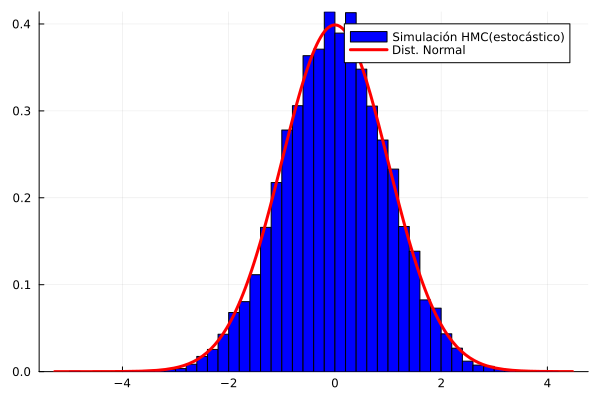

In [4]:
n = 10000
q = zeros(n)
N = rand(Normal(),n)
p =  zeros(n)

H(q,p) = (q^2 + p^2)/2

q[1] = 5
p[1] = rand(Normal())
for i in 2:n
    q_prop, p_prop = leap_frog!( [q[i-1]], [N[i]], 0.3, 5 , u -> u[1] )
    if log(rand(Uniform())) < - H(q_prop[1],p_prop[1]) + H(q[i-1],N[i])
        q[i] = q_prop[1]
        p[i] = p_prop[1]
    else
        q[i] = q[i-1]
        p[i] = p[i-1]
    end
end

histogram(p, label="Simulación HMC(estocástico)", normalize=:pdf, color=:blue)
plot!(f, label="Dist. Normal", lw=3, color=:red)



# Booberang de Rosenbrock

In [6]:
using Plots
using LinearAlgebra
using Distributions

In [21]:
using Plots

a = 1
b = 100
μ = 0

f(x, y) =  exp( -a*(y-μ)^2 - b*(y-x^2)^2 ) #función objetivo

f (generic function with 1 method)

In [22]:
# Generar datos para la gráfica
x = range(-1.5, 1.5, length=1000)
y = range(-0.5, 2, length=1000)
z = @. f(x', y)

# Graficar
Cora = heatmap(x, y, z, title = "")

In [3]:
#Random Walk
using Distributions

#Matriz de varianzas y covarianzas
C = [1 0; 0 1]

#Inicializar lista de trayectorías
X = [-1 3]

#Numero de iteraciones
n = 10000

#Generar las trayectorias de las cadenas

for t in 1:n
    z = reshape( X[size(X)[1], : ] , 1, 2)                  #Ultimó elemento de la trayectoria
    m = X[size(X)[1], : ]                                   #Vector de medias actualizado
    y = reshape(rand(MvNormal(m, C)), 1, 2)                 #Nueva propuesta del kernel gausiano
    α = min( f( y[1], y[2] ) / f( X[t, 1], X[t, 2] ), 1 )  #Probabilidad de aceptación
    if rand(Uniform(0, 1)) < α                              #Aceptar con probabilidad α                  
        X = [X; y] 
    else
        X = [X; z]                                          #Rechazar con probabilidad 1-α
    end
end

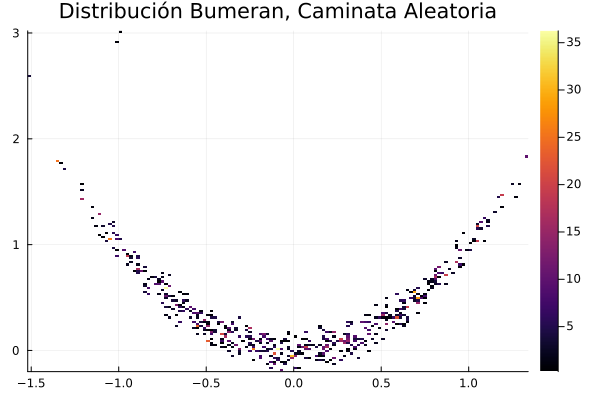

In [5]:
using Plots

histogram2d(X[:, 1], X[:, 2], nbins=200, normalize=true)

title!("Distribución Bumeran, Caminata Aleatoria")
#savefig("Bumeran.png")

In [20]:
using Plots

# Generar datos para la gráfica
x = range(-6, 6, length=1000)
y = range(-5, 7, length=1000)
z = @. f(x', y)

# Animación
Corazón = heatmap(x, y, z, title = "Corazón, Kernel Gausiano")

# Use the @animate macro in front of a loop to create each frame of your animation
anim_1 = @animate for t in 1:100
    # At each iteration we will plot a new subset of the data
    # I set the xlimits and ylimits so the x/y axes don't autofit as the data grows
    scatter([ X[1:t, 1] for i in 1:t ], [ X[1:t, 2] for i in 1:t ], 
         xlims=(-2,3),
         ylims=(0, 4.5), color = "blue", ms=5, label = "")
    plot!([ X[1:t, 1] for i in 1:t ], [ X[1:t, 2] for i in 1:t ], 
         xlims=(-2,3),
         ylims=(0, 4.5), style = :dash, color = "lightskyblue", label = "")
    contour!(collect(-1.5:0.01:1.5), collect(-1.0:0.01:3.0), contour_joint, nlevels=3, xlim=(-1.5,1.5), ylim=(-1,3), color="blue")
end 



gif(anim_1, "Booberang_(HMC).mp4", fps = 10)

LoadError: MethodError: no method matching f(::Vector{Float64})

[0mClosest candidates are:
[0m  f(::Any, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[7]:7[24m[39m


In [11]:
using ForwardDiff

a = 1
b = 100
μ = 0

f(z) =  ( π/sqrt( a*b ) )*exp( -a*(z[2]-μ)^2 - b*(z[2]-z[1]^2)^2 ) #Distribución objetivo

V(z) = -( -a*(z[2]-μ)^2 - b*(z[2]-z[1]^2)^2 )

grad_V(z) = ForwardDiff.gradient(V, z)

contour_joint(x, y) = begin
    f([x,y])
end

contour_joint (generic function with 1 method)

In [7]:
# MCH boomerang
using Distributions
n = 10000
q = [ zeros(2) for i in 1:n ]
p = [ zeros(2) for i in 1:n ]
N = [ rand(Normal(0,1), 2) for i in 1:n ]
H(q,p) = V(q) + 0.5*sum( p.^2.0)

q[1] = [0.0, 0.5]
p[1] = [0.0, 0.0]
for i in 2:n
    q_prop, p_prop = leap_frog!( q[i-1], N[i], 0.01, 200, grad_V )
    if log(rand(Uniform())) < min( - H(q_prop,- p_prop) + H(q[i-1],N[i]), 0.0)
        q[i] = q_prop
        p[i] = - p_prop
    else
        
        q[i] = q[i-1]
        p[i] = p[i-1]
    end
end

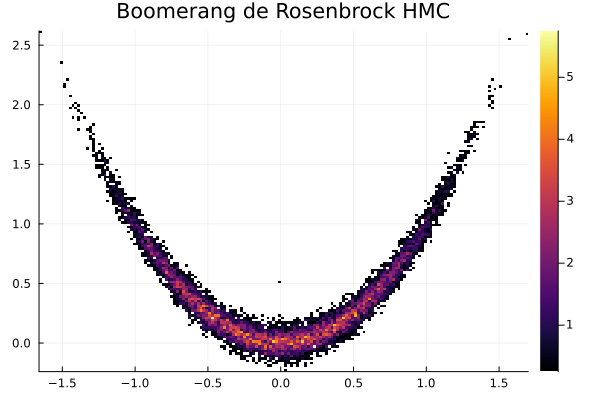

In [8]:
using Plots

histogram2d([ q[i][1] for i in 1:n ], [ q[i][2] for i in 1:n ], nbins=200, normalize=true)

title!("Boomerang de Rosenbrock HMC")
#savefig("Boomerang_de_Rosenbrock_HMC.png")

In [9]:
using Plots; pythonplot()

contour_joint(x, y) = begin
    f([x,y])
end

# Use the @animate macro in front of a loop to create each frame of your animation
anim_1 = @animate for t in 1:100
    # At each iteration we will plot a new subset of the data
    # I set the xlimits and ylimits so the x/y axes don't autofit as the data grows
    scatter([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-2,3),
         ylims=(0, 4.5), color = "blue", ms=5, label = "")
    plot!([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-2,3),
         ylims=(0, 4.5), style = :dash, color = "lightskyblue", label = "")
    contour!(collect(-1.5:0.01:1.5), collect(-1.0:0.01:3.0), contour_joint, nlevels=3, xlim=(-1.5,1.5), ylim=(-1,3), color="blue")
end 


gif(anim_1, "Booberang_(HMC).mp4", fps = 10)

┌ Warning: `PythonPlot` 1.0.3 is not compatible with this version of `Plots`. The declared compatibility is 1 - 1.0.2.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends.jl:55
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


LoadError: UndefVarError: `pyisnone` not defined

# Embudo de Neal

In [9]:
using ForwardDiff

function ND(μ, σ, x)
    ( 1/(σ*√(2π)) * exp((-1/2)*((x-μ)/σ)^2))
end

f(z) =  ND( 0, exp( z[1]/2), z[2] ) * ND( 0, 3, z[1] )

V(z) = -log( f(z) )

grad_V(z) = ForwardDiff.gradient(V, z)

contour_joint(x, y) = begin
    f([x,y])
end

contour_joint (generic function with 1 method)

In [10]:
using Distributions
# MCH embudo de Neal
n = 10000
q = [ zeros(2) for i in 1:n ]
p = [ zeros(2) for i in 1:n ]
N = [ rand(Normal(0,1), 2) for i in 1:n ]
H(q,p) = V(q) + 0.5*sum( p.^2.0)

q[1] = [3, 5]
p[1] = [0.0, 0.0]
for i in 2:n
    q_prop, p_prop = leap_frog!( q[i-1], N[i], 0.01, 200, grad_V )
    if log(rand(Uniform())) < min( - H(q_prop,-p_prop) + H(q[i-1],N[i]), 0.0)
        q[i] = q_prop
        p[i] = -p_prop
    else
        
        q[i] = q[i-1]
        p[i] = p[i-1]
    end
end

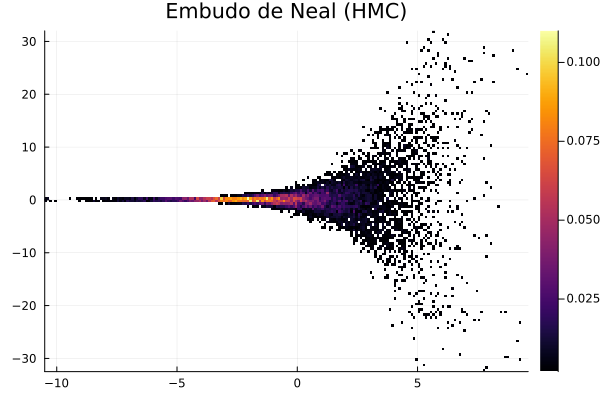

In [11]:
using Plots

histogram2d([ q[i][1] for i in 1:n ], [ q[i][2] for i in 1:n ], nbins=200, normalize=true)

title!("Embudo de Neal (HMC)")
#savefig("Embudo_de_Neal_HMC.png")

In [ ]:
using Plots; pythonplot()

contour_joint(x, y) = begin
    f([x,y])
end

# Use the @animate macro in front of a loop to create each frame of your animation
anim_2 = @animate for t in 1:100
    # At each iteration we will plot a new subset of the data
    # I set the xlimits and ylimits so the x/y axes don't autofit as the data grows
    scatter([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-12,10),
         ylims=(-20, 20), color = "blue", ms=5, label = "")
    plot!([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-12,10),
         ylims=(-20, 20), style = :dash, color = "lightskyblue", label = "")
    contour!(collect(-12:0.01:10), collect(-20:0.01:20), contour_joint, nlevels=3, xlim=(-12,10), ylim=(-20,20), color="blue")
end 



gif(anim_2, "Embudo_(HMC).mp4", fps = 10)


# Distribución Multimodal

In [12]:
using ForwardDiff

a = 1
b = 5
μ = 10

f(z) =  ( π/sqrt( a*b ) )*exp( -a*(z[2]-μ)^2 - b*(z[2]-z[1]^2)^2 ) #Distribución objetivo

V(z) = -( -a*(z[2]-μ)^2 - b*(z[2]-z[1]^2)^2 )

grad_V(z) = ForwardDiff.gradient(V, z)

contour_joint(x, y) = begin
    f([x,y])
end

contour_joint (generic function with 1 method)

In [15]:
using Distributions

# MCH Distribución multimodal
n = 10000
q = [ zeros(2) for i in 1:n ]
p = [ zeros(2) for i in 1:n ]
N = [ rand(Normal(0,1), 2) for i in 1:n ]
H(q,p) = V(q) + 0.5*sum( p.^2.0)

q[1] = [0.0, 10]
p[1] = [0.0, 0.0]
for i in 2:n
    q_prop, p_prop = leap_frog!( q[i-1], N[i], 0.01, 200, grad_V )
    if log(rand(Uniform())) < min( - H(q_prop,-p_prop) + H(q[i-1],N[i]), 0.0)
        q[i] = q_prop
        p[i] = -p_prop
    else
        
        q[i] = q[i-1]
        p[i] = p[i-1]
    end
end

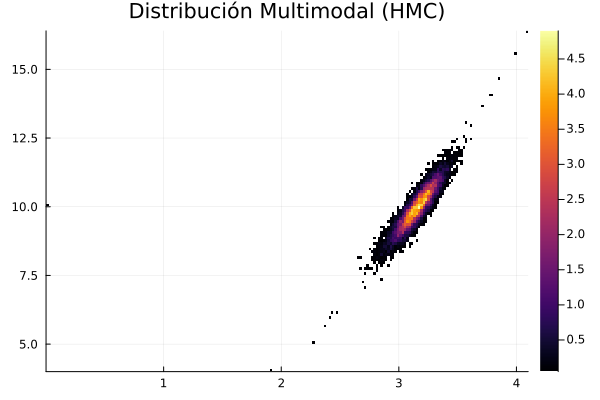

In [16]:
using Plots

histogram2d([ q[i][1] for i in 1:n ], [ q[i][2] for i in 1:n ], nbins=200, normalize=true)

title!("Distribución Multimodal (HMC)")
#savefig("Distribución_Multimodal_(HMC).png")

[ Info: Saved animation to /Users/sabino/Desktop/Tesis/Multimodal(HMC).mp4


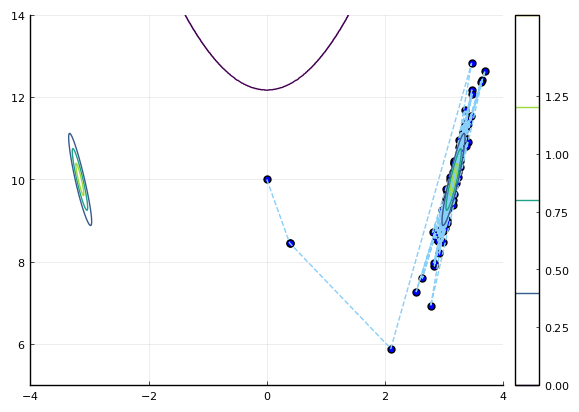

Plots.AnimatedGif("/Users/sabino/Desktop/Tesis/Multimodal(HMC).mp4")

In [9]:
using Plots; pythonplot()

contour_joint(x, y) = begin
    f([x,y])
end

# Use the @animate macro in front of a loop to create each frame of your animation
anim_3 = @animate for t in 1:100
    # At each iteration we will plot a new subset of the data
    # I set the xlimits and ylimits so the x/y axes don't autofit as the data grows
    scatter([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-4,4),
         ylims=(5, 14), color = "blue", ms=5, label = "")
    plot!([ q[i][1] for i in 1:t ], [ q[i][2] for i in 1:t ], 
         xlims=(-4,4),
         ylims=(5, 14), style = :dash, color = "lightskyblue", label = "")
    contour!(collect(-4:0.01:4), collect(5:0.01:14), contour_joint, nlevels=3, xlim=(-4,4), ylim=(5,14), color="blue")
end 

gif(anim_3, "Multimodal(HMC).mp4", fps = 10)